# OpenCV Image Filtering Tutorial

This notebook demonstrates various image filtering techniques using OpenCV, including smoothing, edge detection, and noise reduction.

## Contents
1. [Setup and Installation](#setup)
2. [Smoothing Filters](#smoothing)
3. [Edge Detection](#edge-detection)
4. [Noise Reduction](#noise-reduction)
5. [Custom Kernels](#custom-kernels)
6. [Practical Applications](#applications)
7. [Exercises](#exercises)

## 1. Setup and Installation {#setup}

First, let's import the necessary libraries and our custom modules.

In [19]:
# Install required packages if not already installed
# !pip install opencv-python numpy matplotlib

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Add our source directory to Python path
sys.path.append('../src')

# Import our custom modules
from filtering import smoothing, edge_detection, noise_reduction
from basic_operations import image_io, display
from utils import visualization

print("✅ All modules imported successfully!")

✅ All modules imported successfully!


# Create or Load Sample Image

Let's create a sample image with various features for filtering demonstrations.

Image shape: (300, 400, 3)


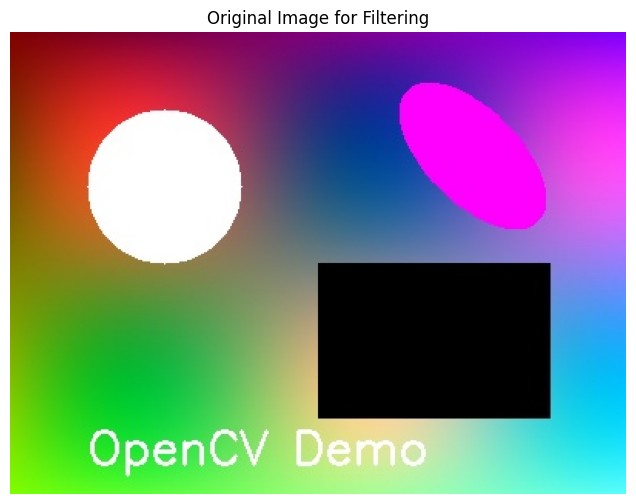

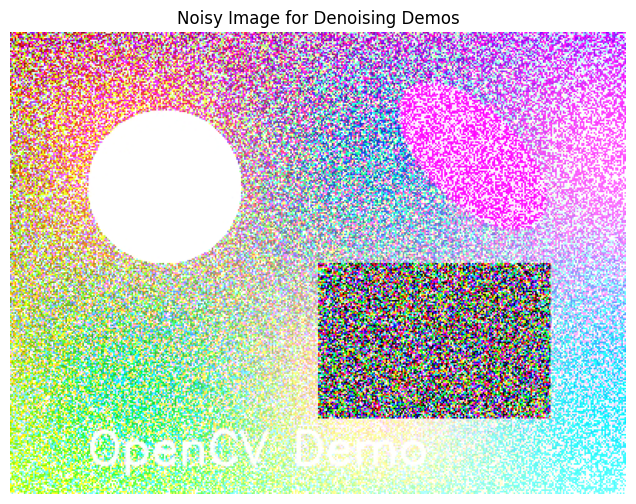

In [20]:
# Load sample image
image_path = '../sample_images/original/demo_image.jpg'
if os.path.exists(image_path):
    image = image_io.load_image(image_path)
else:
    # Create a demo image if sample doesn't exist
    image = np.zeros((400, 600, 3), dtype=np.uint8)
    
    # Add various shapes and textures for filtering demonstration
    cv2.rectangle(image, (50, 50), (200, 200), (255, 100, 0), -1)
    cv2.circle(image, (400, 150), 80, (0, 255, 100), -1)
    cv2.line(image, (300, 250), (550, 350), (100, 0, 255), 5)
    
    # Add some noise patterns
    for i in range(100):
        x, y = np.random.randint(0, 600), np.random.randint(0, 400)
        cv2.circle(image, (x, y), 2, (255, 255, 255), -1)
    
    # Add text
    cv2.putText(image, 'Filter Demo', (250, 300), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), 3)

print(f"Image shape: {image.shape}")

# Display the original image
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image for Filtering')
plt.axis('off')
plt.show()

# Also create a noisy version for noise reduction demos
noisy_image = image.copy()
noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
noisy_image = cv2.add(noisy_image, noise)

plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Noisy Image for Denoising Demos')
plt.axis('off')
plt.show()

## 2. Smoothing Filters {#smoothing}

Smoothing filters help reduce noise and blur images. Different kernels produce different effects.

### 2.1 Gaussian Blur
Most commonly used smoothing filter that uses a Gaussian kernel.

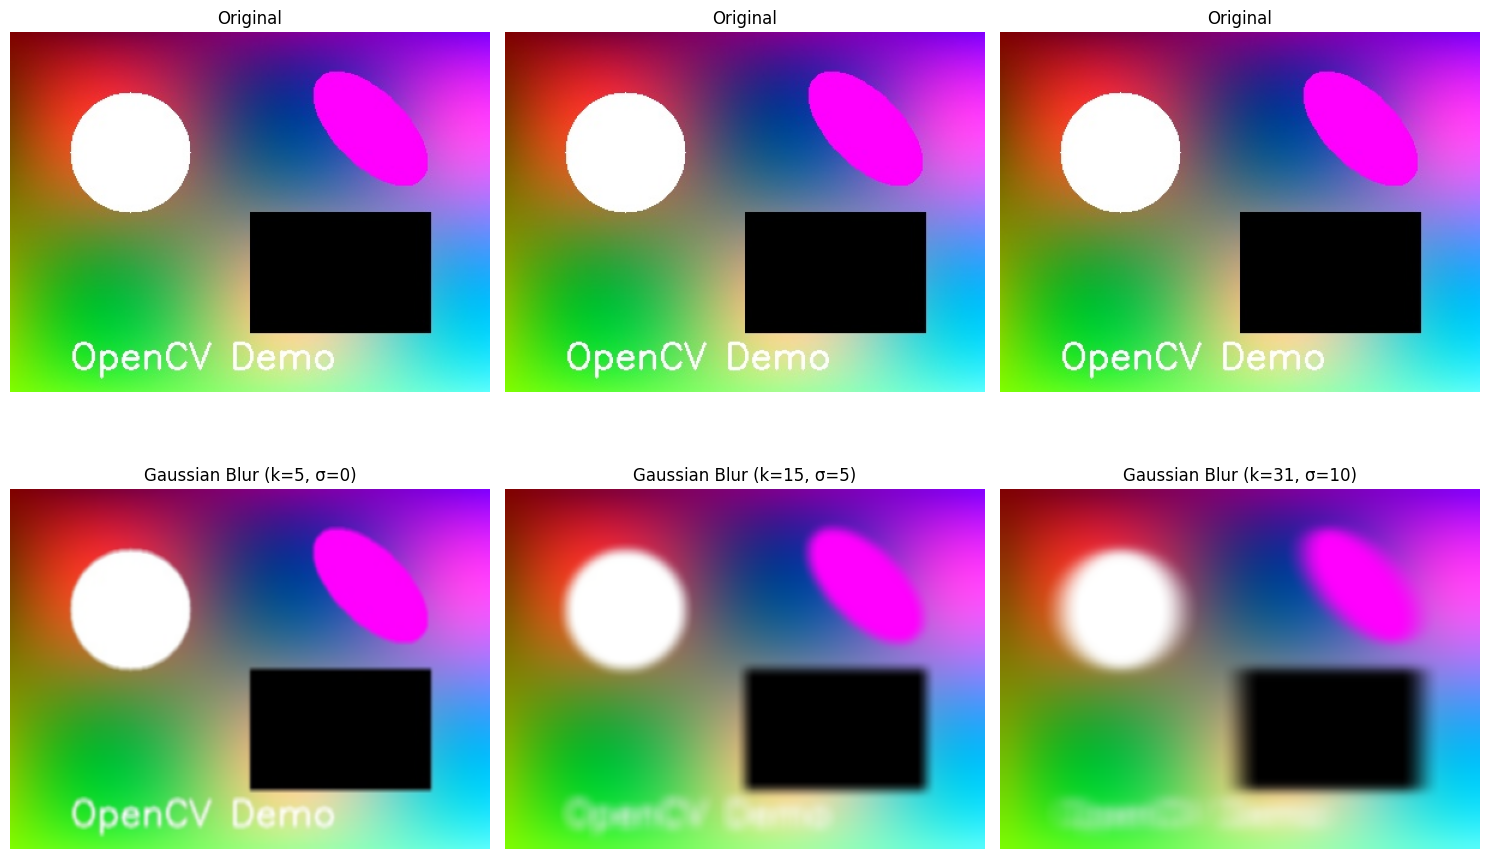

In [21]:
# Apply different levels of Gaussian blur
kernel_sizes = [(5, 5), (15, 15), (31, 31)]
sigma_values = [0, 5, 10]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, (ksize, sigma) in enumerate(zip(kernel_sizes, sigma_values)):
    # Gaussian blur
    if sigma == 0:
        # Let OpenCV calculate sigma automatically
        blurred = smoothing.gaussian_blur(image, ksize)
    else:
        blurred = smoothing.gaussian_blur(image, ksize, sigma_x=sigma, sigma_y=sigma)
    
    # Original in top row
    axes[0, i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0, i].set_title(f'Original')
    axes[0, i].axis('off')
    
    # Blurred in bottom row
    axes[1, i].imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
    axes[1, i].set_title(f'Gaussian Blur (k={ksize[0]}, σ={sigma})')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

### 2.2 Box Filter and Average Blur
Simple averaging filters that blur images uniformly.

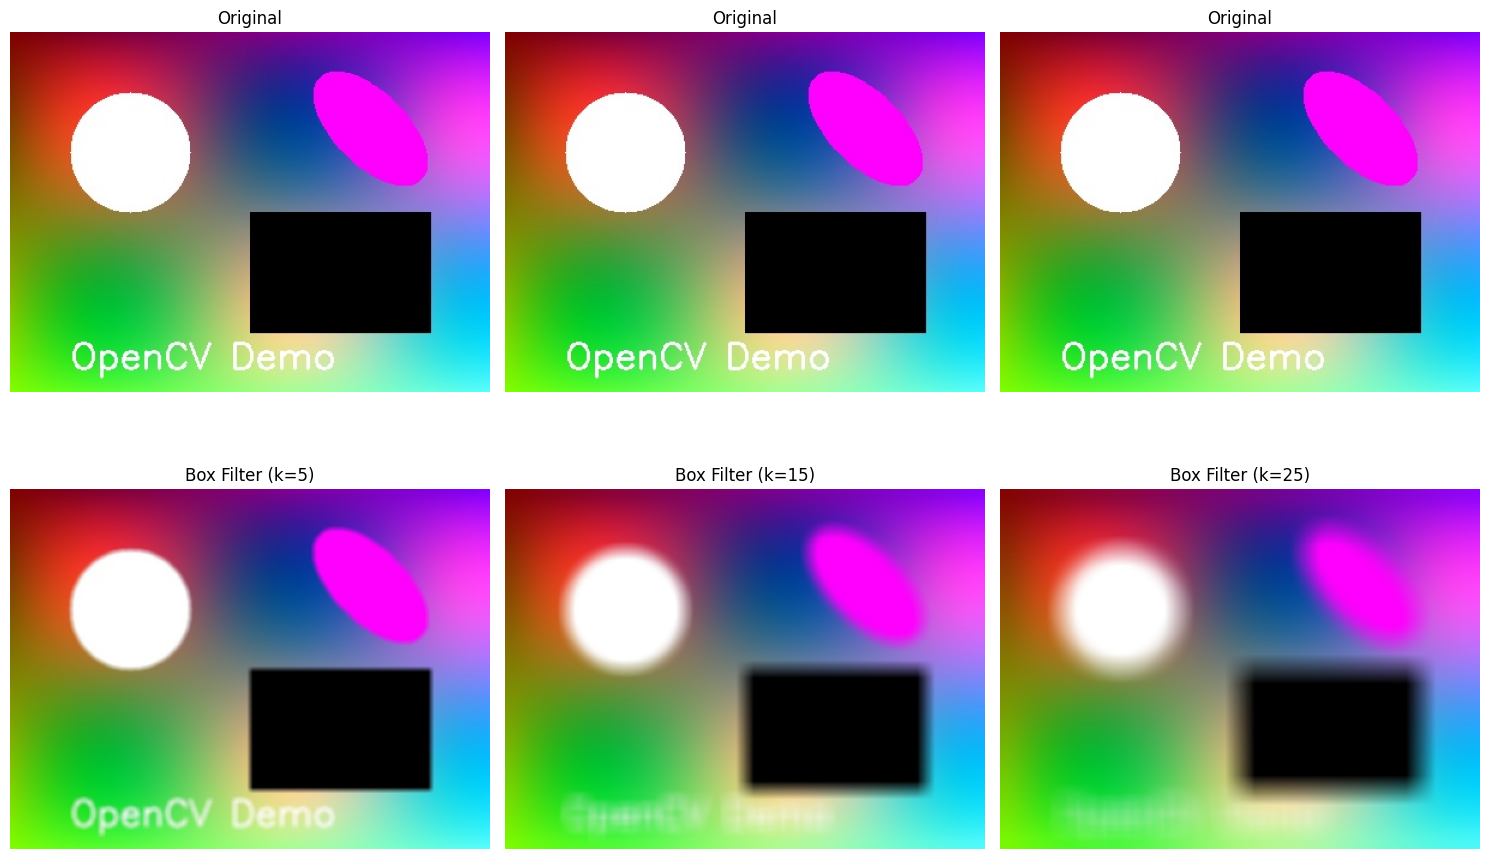

In [22]:
# Compare box filter with different parameters
kernel_sizes = [5, 15, 25]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, ksize in enumerate(kernel_sizes):
    # Original
    axes[0, i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0, i].set_title(f'Original')
    axes[0, i].axis('off')
    
    # Box filter (normalized) - needs tuple
    box_filtered = smoothing.box_filter(image, (ksize, ksize), normalize=True)
    axes[1, i].imshow(cv2.cvtColor(box_filtered, cv2.COLOR_BGR2RGB))
    axes[1, i].set_title(f'Box Filter (k={ksize})')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

### 2.3 Median Filter
Excellent for removing salt-and-pepper noise while preserving edges.

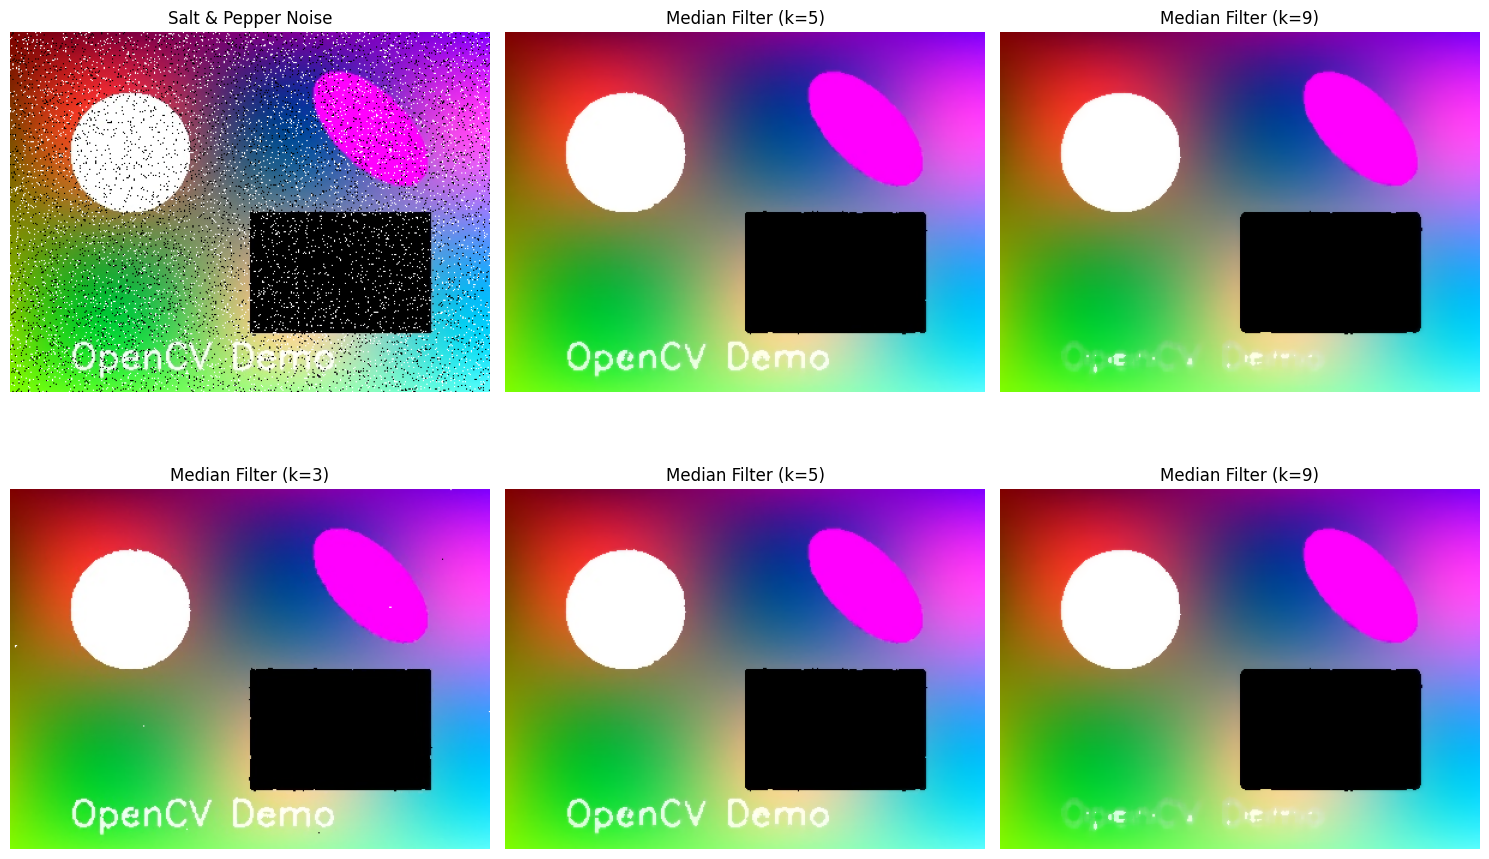

In [23]:
# Create salt and pepper noise
salt_pepper_image = image.copy()
salt_pepper_noise = np.random.random(salt_pepper_image.shape[:2])
salt_pepper_image[salt_pepper_noise < 0.05] = 0  # Salt (black pixels)
salt_pepper_image[salt_pepper_noise > 0.95] = 255  # Pepper (white pixels)

# Apply median filtering
kernel_sizes = [3, 5, 9]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Show noisy image in first column
axes[0, 0].imshow(cv2.cvtColor(salt_pepper_image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Salt & Pepper Noise')
axes[0, 0].axis('off')

for i, ksize in enumerate(kernel_sizes):
    # Apply median filter
    median_filtered = smoothing.median_filter(salt_pepper_image, ksize)
    
    if i == 0:
        # Show original in top row, first position is noise
        axes[0, i].imshow(cv2.cvtColor(salt_pepper_image, cv2.COLOR_BGR2RGB))
        axes[0, i].set_title('Salt & Pepper Noise')
        axes[0, i].axis('off')
    else:
        axes[0, i].imshow(cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB))
        axes[0, i].set_title(f'Median Filter (k={ksize})')
        axes[0, i].axis('off')
    
    # Bottom row shows all median filtered versions
    axes[1, i].imshow(cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB))
    axes[1, i].set_title(f'Median Filter (k={ksize})')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

### 2.4 Bilateral Filter
Preserves edges while smoothing noise - excellent for skin smoothing and artistic effects.

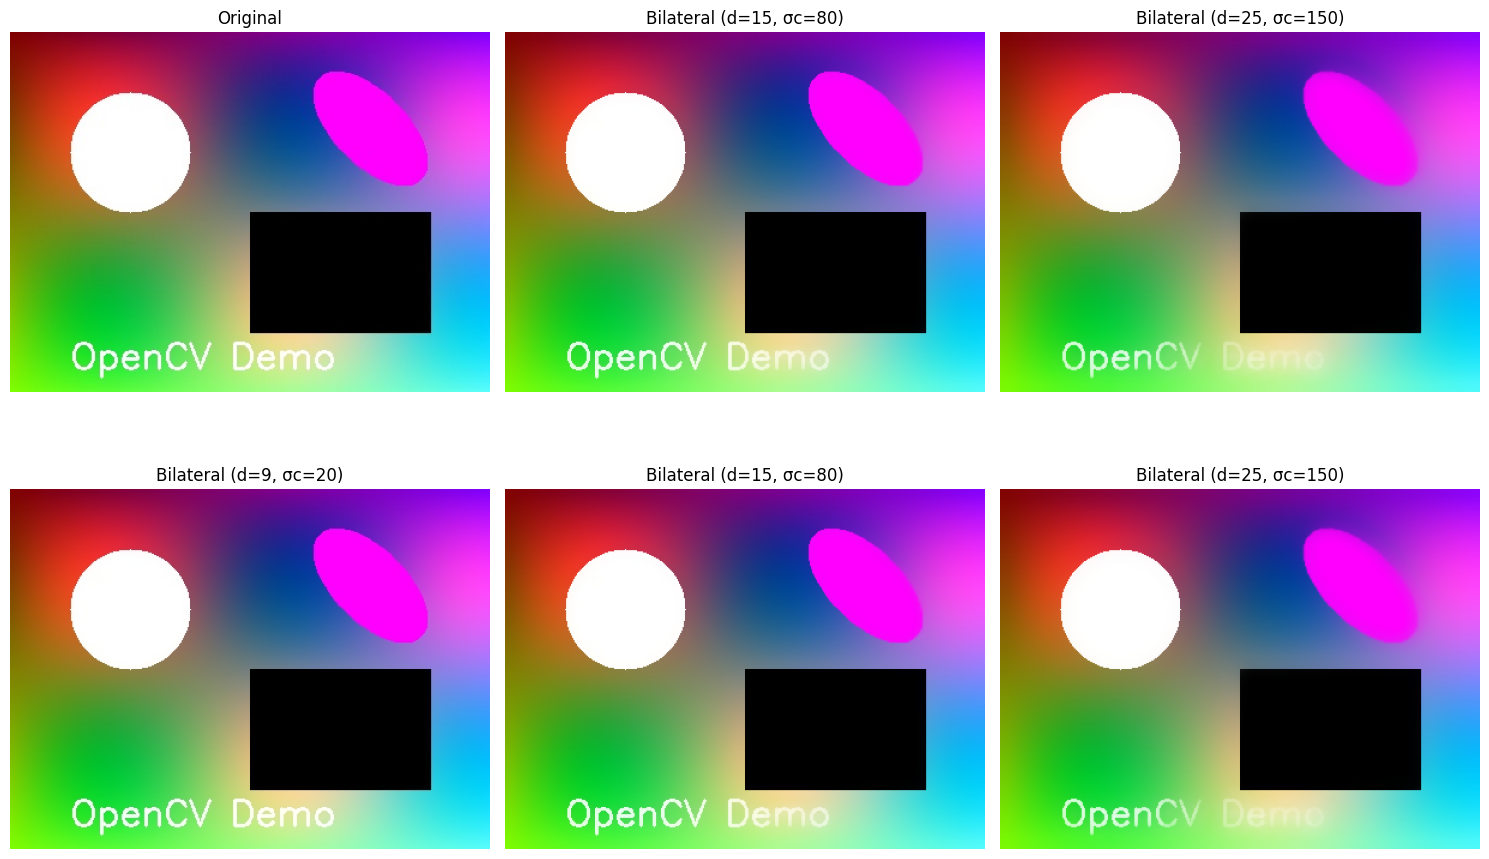

In [24]:
# Apply bilateral filtering with different parameters
d_values = [9, 15, 25]  # Diameter of pixel neighborhood
sigma_color_values = [20, 80, 150]  # Filter sigma in color space
sigma_space = 80  # Filter sigma in coordinate space

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Show original
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

for i, (d, sigma_color) in enumerate(zip(d_values, sigma_color_values)):
    # Apply bilateral filter
    bilateral_filtered = smoothing.bilateral_filter(image, d, sigma_color, sigma_space)
    
    if i == 0:
        axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[0, 0].set_title('Original')
        axes[0, 0].axis('off')
    else:
        axes[0, i].imshow(cv2.cvtColor(bilateral_filtered, cv2.COLOR_BGR2RGB))
        axes[0, i].set_title(f'Bilateral (d={d}, σc={sigma_color})')
        axes[0, i].axis('off')
    
    # Bottom row shows all bilateral filtered versions
    axes[1, i].imshow(cv2.cvtColor(bilateral_filtered, cv2.COLOR_BGR2RGB))
    axes[1, i].set_title(f'Bilateral (d={d}, σc={sigma_color})')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

## 3. Edge Detection {#edge-detection}

Edge detection is crucial for finding boundaries and extracting features from images.

### 3.1 Canny Edge Detection
The most popular edge detection algorithm that uses gradient magnitude and direction.

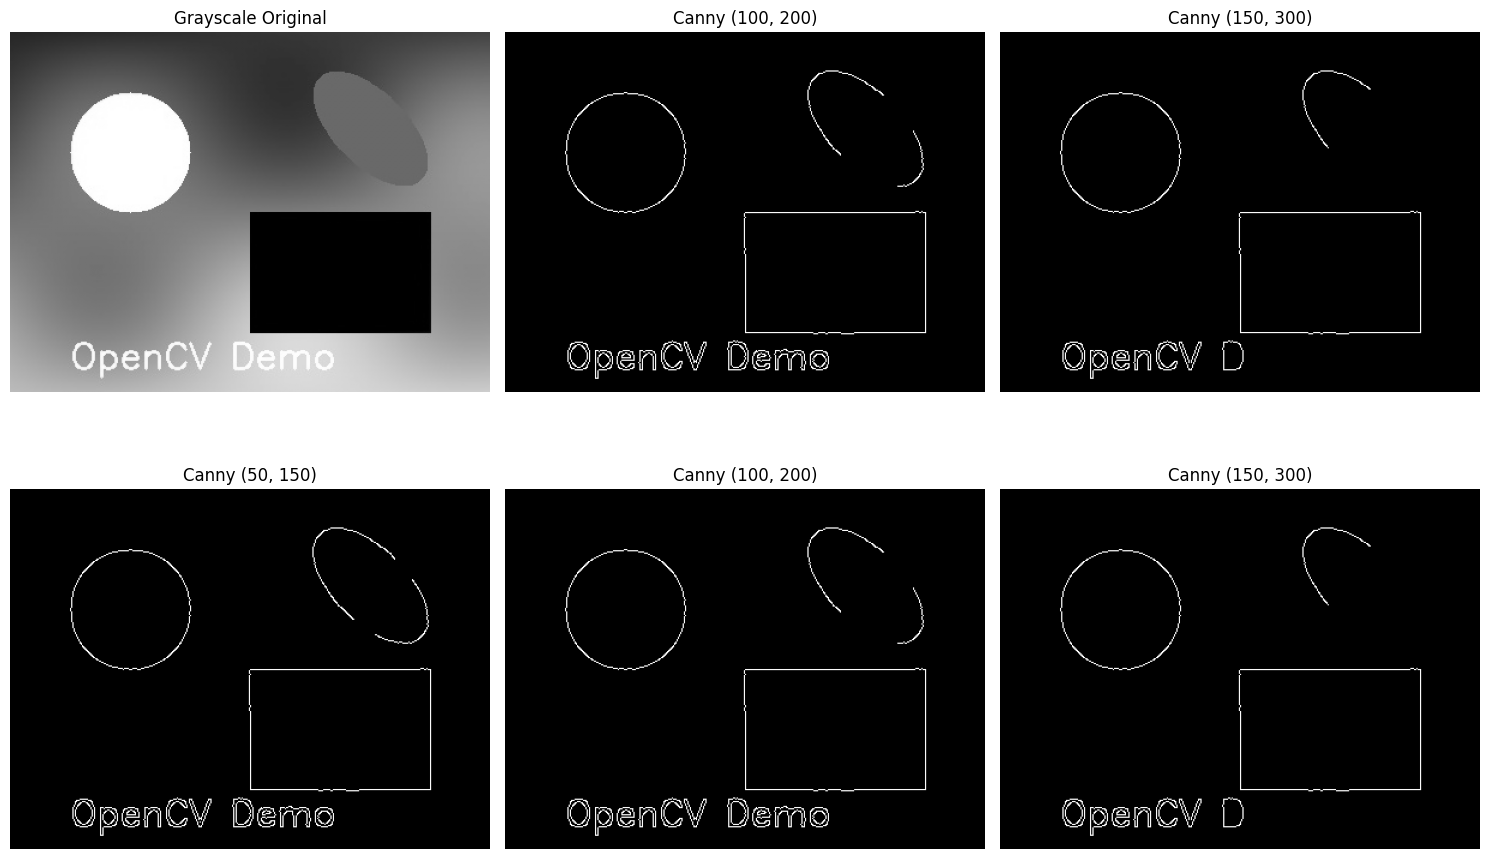

In [25]:
# Apply Canny edge detection with different thresholds
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Different threshold combinations
threshold_pairs = [(50, 150), (100, 200), (150, 300)]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Show grayscale original
axes[0, 0].imshow(gray_image, cmap='gray')
axes[0, 0].set_title('Grayscale Original')
axes[0, 0].axis('off')

for i, (low_thresh, high_thresh) in enumerate(threshold_pairs):
    # Apply Canny edge detection
    edges = edge_detection.canny_edge_detection(gray_image, low_thresh, high_thresh)
    
    if i == 0:
        axes[0, 0].imshow(gray_image, cmap='gray')
        axes[0, 0].set_title('Grayscale Original')
        axes[0, 0].axis('off')
    else:
        axes[0, i].imshow(edges, cmap='gray')
        axes[0, i].set_title(f'Canny ({low_thresh}, {high_thresh})')
        axes[0, i].axis('off')
    
    # Bottom row shows all edge detection results
    axes[1, i].imshow(edges, cmap='gray')
    axes[1, i].set_title(f'Canny ({low_thresh}, {high_thresh})')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

### 3.2 Sobel Edge Detection
Detects edges using gradient operators in X and Y directions.

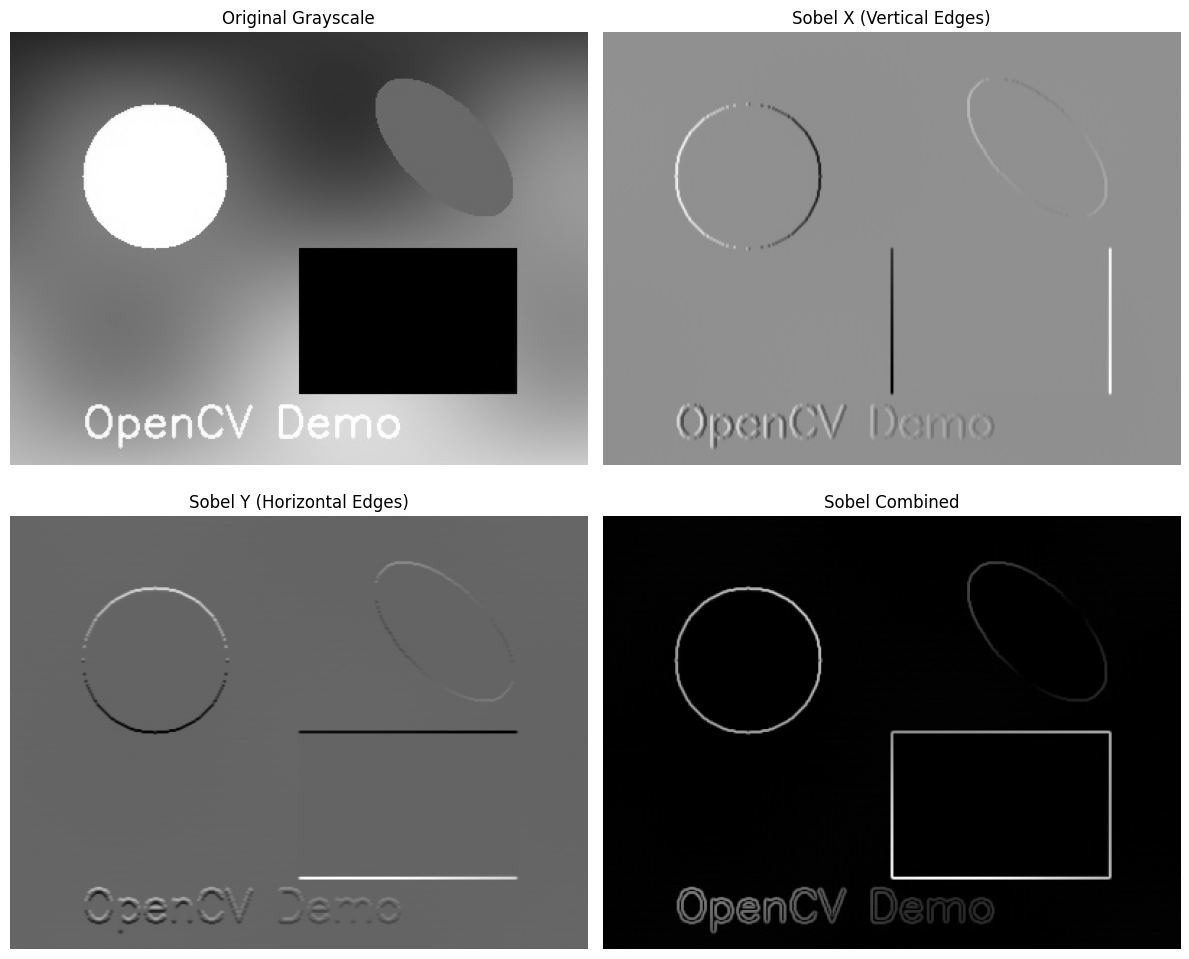

In [26]:
# Apply Sobel edge detection
sobel_x = edge_detection.sobel_edge_detection(gray_image, dx=1, dy=0)
sobel_y = edge_detection.sobel_edge_detection(gray_image, dx=0, dy=1)
sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)

# Display results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(gray_image, cmap='gray')
axes[0, 0].set_title('Original Grayscale')
axes[0, 0].axis('off')

axes[0, 1].imshow(sobel_x, cmap='gray')
axes[0, 1].set_title('Sobel X (Vertical Edges)')
axes[0, 1].axis('off')

axes[1, 0].imshow(sobel_y, cmap='gray')
axes[1, 0].set_title('Sobel Y (Horizontal Edges)')
axes[1, 0].axis('off')

axes[1, 1].imshow(sobel_combined, cmap='gray')
axes[1, 1].set_title('Sobel Combined')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

### 3.3 Laplacian Edge Detection
Detects edges using second-order derivatives.

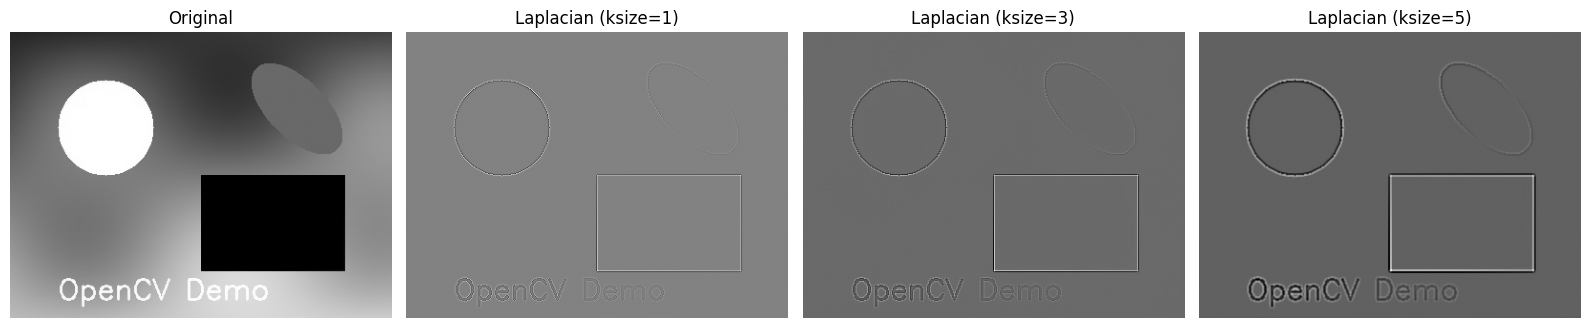

In [27]:
# Apply Laplacian edge detection with different kernel sizes
kernel_sizes = [1, 3, 5]

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

for i, ksize in enumerate(kernel_sizes):
    laplacian = edge_detection.laplacian_edge_detection(gray_image, ksize)
    axes[i+1].imshow(laplacian, cmap='gray')
    axes[i+1].set_title(f'Laplacian (ksize={ksize})')
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()

### 3.4 Scharr Edge Detection
More accurate than Sobel for small kernels.

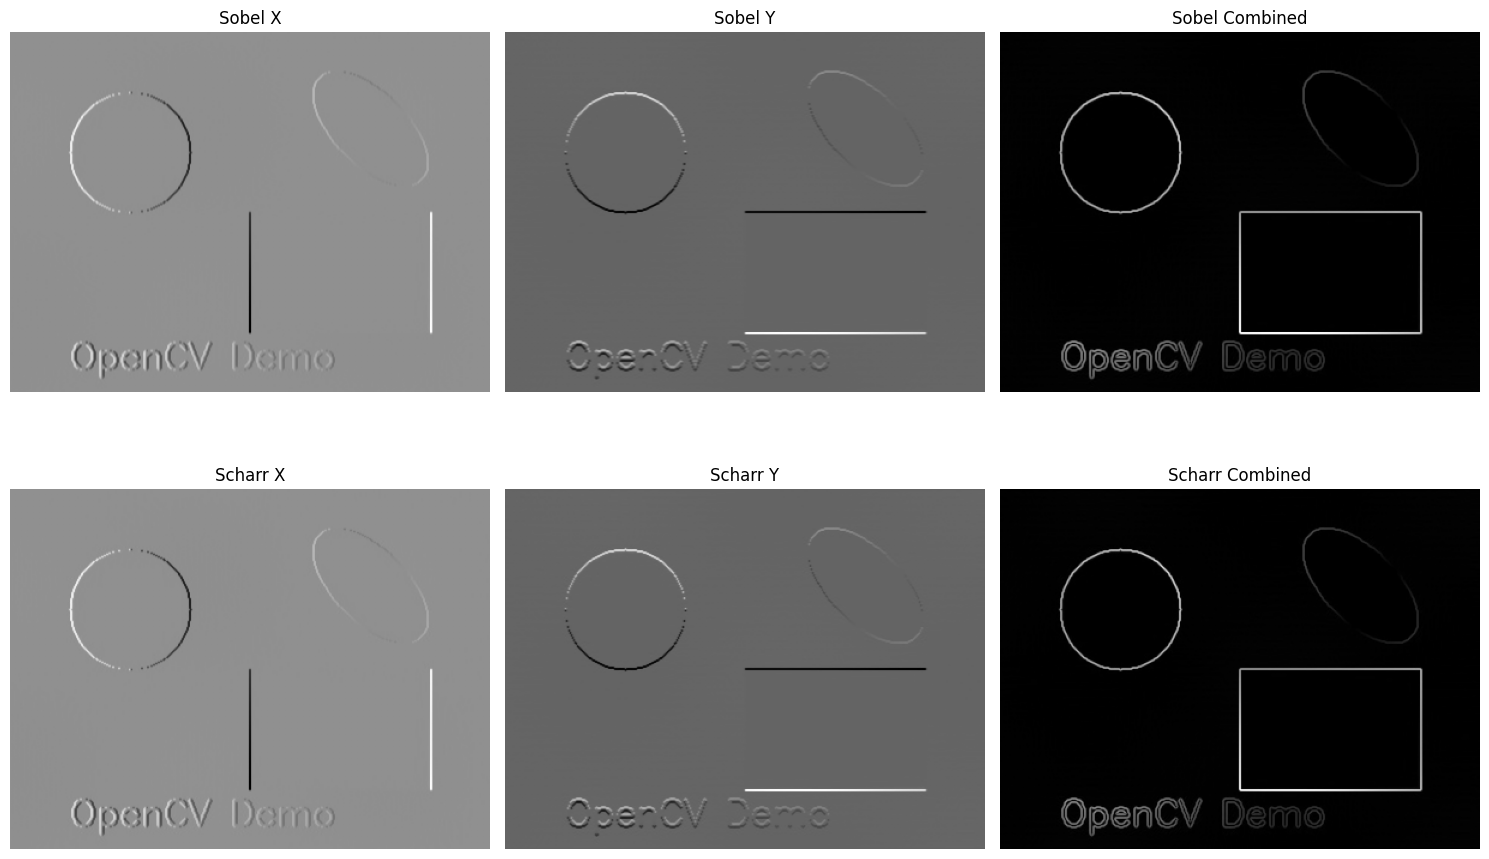

In [28]:
# Apply Scharr edge detection
scharr_x = edge_detection.scharr_edge_detection(gray_image, dx=1, dy=0)
scharr_y = edge_detection.scharr_edge_detection(gray_image, dx=0, dy=1)
scharr_combined = np.sqrt(scharr_x**2 + scharr_y**2)

# Compare Sobel vs Scharr
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Sobel results (top row)
axes[0, 0].imshow(sobel_x, cmap='gray')
axes[0, 0].set_title('Sobel X')
axes[0, 0].axis('off')

axes[0, 1].imshow(sobel_y, cmap='gray')
axes[0, 1].set_title('Sobel Y')
axes[0, 1].axis('off')

axes[0, 2].imshow(sobel_combined, cmap='gray')
axes[0, 2].set_title('Sobel Combined')
axes[0, 2].axis('off')

# Scharr results (bottom row)
axes[1, 0].imshow(scharr_x, cmap='gray')
axes[1, 0].set_title('Scharr X')
axes[1, 0].axis('off')

axes[1, 1].imshow(scharr_y, cmap='gray')
axes[1, 1].set_title('Scharr Y')
axes[1, 1].axis('off')

axes[1, 2].imshow(scharr_combined, cmap='gray')
axes[1, 2].set_title('Scharr Combined')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

## 4. Noise Reduction {#noise-reduction}

Specialized techniques for removing different types of noise from images.

### 4.1 Non-Local Means Denoising
Advanced algorithm that removes noise while preserving image details.

In [ ]:
# Apply Non-Local Means denoising to colored and grayscale images
gray_noisy = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY)

# Denoise colored image
denoised_color = noise_reduction.denoise_nlm_colored(noisy_image)

# Denoise grayscale image
denoised_gray = noise_reduction.denoise_nlm(gray_noisy)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Color images (top row)
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Color')
axes[0, 0].axis('off')

axes[0, 1].imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Noisy Color')
axes[0, 1].axis('off')

axes[0, 2].imshow(cv2.cvtColor(denoised_color, cv2.COLOR_BGR2RGB))
axes[0, 2].set_title('Denoised Color (NLM)')
axes[0, 2].axis('off')

# Grayscale images (bottom row)
gray_original = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
axes[1, 0].imshow(gray_original, cmap='gray')
axes[1, 0].set_title('Original Grayscale')
axes[1, 0].axis('off')

axes[1, 1].imshow(gray_noisy, cmap='gray')
axes[1, 1].set_title('Noisy Grayscale')
axes[1, 1].axis('off')

axes[1, 2].imshow(denoised_gray, cmap='gray')
axes[1, 2].set_title('Denoised Grayscale (NLM)')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

AttributeError: module 'filtering.noise_reduction' has no attribute 'non_local_means_denoising_color'

### 4.2 Morphological Noise Reduction
Using morphological operations to remove specific types of noise.

In [ ]:
# Create specific noise patterns for morphological cleaning
binary_noisy = cv2.threshold(gray_noisy, 127, 255, cv2.THRESH_BINARY)[1]

# Create a custom morphological denoising function with operation parameter
def morphological_denoising(image, operation='combined', kernel_size=3):
    """Custom morphological denoising function with operation parameter."""
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
    
    if operation == 'opening':
        return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    elif operation == 'closing':
        return cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    elif operation == 'combined':
        # Apply opening first, then closing
        opened = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
        closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)
        return closed
    else:
        # Default to the module's denoise_morphological function
        return noise_reduction.denoise_morphological(image, kernel_size)

# Apply morphological operations for noise reduction
cleaned_opening = morphological_denoising(binary_noisy, operation='opening')
cleaned_closing = morphological_denoising(binary_noisy, operation='closing')
cleaned_combined = morphological_denoising(binary_noisy, operation='combined')

# Display results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(binary_noisy, cmap='gray')
axes[0, 0].set_title('Binary Noisy Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(cleaned_opening, cmap='gray')
axes[0, 1].set_title('Opening (Remove Small Objects)')
axes[0, 1].axis('off')

axes[1, 0].imshow(cleaned_closing, cmap='gray')
axes[1, 0].set_title('Closing (Fill Small Holes)')
axes[1, 0].axis('off')

axes[1, 1].imshow(cleaned_combined, cmap='gray')
axes[1, 1].set_title('Combined Morphological Cleaning')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

## 5. Custom Kernels {#custom-kernels}

Creating and applying custom convolution kernels for specialized effects.

### 5.1 Sharpening Kernels

In [ ]:
# Define custom sharpening kernels
sharpen_kernel_1 = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

sharpen_kernel_2 = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
])

unsharp_mask_kernel = np.array([
    [-1, -4, -6, -4, -1],
    [-4, -16, -24, -16, -4],
    [-6, -24, 476, -24, -6],
    [-4, -16, -24, -16, -4],
    [-1, -4, -6, -4, -1]
]) / 256

# Apply custom kernels
sharpened_1 = cv2.filter2D(image, -1, sharpen_kernel_1)
sharpened_2 = cv2.filter2D(image, -1, sharpen_kernel_2)
sharpened_unsharp = cv2.filter2D(image, -1, unsharp_mask_kernel)

# Display results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(cv2.cvtColor(sharpened_1, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Sharpen Kernel 1')
axes[0, 1].axis('off')

axes[1, 0].imshow(cv2.cvtColor(sharpened_2, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Sharpen Kernel 2')
axes[1, 0].axis('off')

axes[1, 1].imshow(cv2.cvtColor(sharpened_unsharp, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Unsharp Mask')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Print kernel information
print("Sharpen Kernel 1:")
print(sharpen_kernel_1)
print("\nSharpen Kernel 2:")
print(sharpen_kernel_2)

### 5.2 Emboss and Other Artistic Effects

In [ ]:
# Define artistic effect kernels
emboss_kernel = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
])

edge_enhance_kernel = np.array([
    [0, 0, 0],
    [-1, 1, 0],
    [0, 0, 0]
])

motion_blur_kernel = np.zeros((15, 15))
motion_blur_kernel[7, :] = 1
motion_blur_kernel = motion_blur_kernel / 15

# Apply artistic kernels
embossed = cv2.filter2D(image, -1, emboss_kernel)
edge_enhanced = cv2.filter2D(image, -1, edge_enhance_kernel)
motion_blurred = cv2.filter2D(image, -1, motion_blur_kernel)

# Display results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(cv2.cvtColor(embossed, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Emboss Effect')
axes[0, 1].axis('off')

axes[1, 0].imshow(cv2.cvtColor(edge_enhanced, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Edge Enhancement')
axes[1, 0].axis('off')

axes[1, 1].imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Motion Blur (Horizontal)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

## 6. Practical Applications {#applications}

### 6.1 Image Enhancement Pipeline
Combining multiple filters for optimal image enhancement.

In [ ]:
def image_enhancement_pipeline(img, steps):
    """Apply a series of enhancement steps to an image."""
    result = img.copy()
    
    for step in steps:
        if step['type'] == 'denoise':
            if len(result.shape) == 3:
                result = noise_reduction.denoise_nlm_colored(result)
            else:
                result = noise_reduction.denoise_nlm(result)
        elif step['type'] == 'sharpen':
            kernel = np.array([
                [0, -1, 0],
                [-1, 5, -1],
                [0, -1, 0]
            ])
            result = cv2.filter2D(result, -1, kernel)
        elif step['type'] == 'bilateral':
            result = smoothing.bilateral_filter(result, step['d'], step['sigma_color'], step['sigma_space'])
        elif step['type'] == 'gaussian':
            # Ensure kernel_size is a tuple
            ksize = step['kernel_size']
            if isinstance(ksize, int):
                ksize = (ksize, ksize)
            result = smoothing.gaussian_blur(result, ksize)
    
    return result

# Define enhancement pipeline
enhancement_steps = [
    {'type': 'bilateral', 'd': 9, 'sigma_color': 75, 'sigma_space': 75},
    {'type': 'sharpen'},
    {'type': 'denoise'}
]

# Apply to noisy image
enhanced_image = image_enhancement_pipeline(noisy_image, enhancement_steps)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Clean Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Noisy Image')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
axes[2].set_title('Enhanced Image (Pipeline)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("Enhancement pipeline steps:")
for i, step in enumerate(enhancement_steps, 1):
    print(f"{i}. {step}")

### 6.2 Edge-Preserving Smoothing Comparison
Comparing different edge-preserving filters.

In [ ]:
# Compare edge-preserving smoothing methods
methods = [
    ('Original', image),
    ('Gaussian Blur', smoothing.gaussian_blur(image, (15, 15))),
    ('Bilateral Filter', smoothing.bilateral_filter(image, 15, 80, 80)),
    ('Non-Local Means', noise_reduction.denoise_nlm_colored(image))
]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, (title, img) in enumerate(methods):
    row, col = i // 2, i % 2
    axes[row, col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[row, col].set_title(title)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Show edge preservation comparison
gray_original = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges_original = cv2.Canny(gray_original, 50, 150)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, (title, img) in enumerate(methods):
    row, col = i // 2, i % 2
    if title != 'Original':
        gray_filtered = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        edges_filtered = cv2.Canny(gray_filtered, 50, 150)
        axes[row, col].imshow(edges_filtered, cmap='gray')
    else:
        axes[row, col].imshow(edges_original, cmap='gray')
    axes[row, col].set_title(f'{title} - Edges')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

## 7. Exercises {#exercises}

Try these exercises to practice image filtering techniques:

### Exercise 1: Custom Filter Design
Create your own custom filter for a specific effect.

In [ ]:
# Exercise 1: Design a custom filter
def create_custom_filter(filter_type, size=5):
    """Create custom filters for different effects."""
    if filter_type == 'cross_blur':
        # Create a cross-shaped blur kernel
        kernel = np.zeros((size, size))
        center = size // 2
        kernel[center, :] = 1  # Horizontal line
        kernel[:, center] = 1  # Vertical line
        return kernel / np.sum(kernel)
    
    elif filter_type == 'diamond_blur':
        # Create a diamond-shaped blur kernel
        kernel = np.zeros((size, size))
        center = size // 2
        for i in range(size):
            for j in range(size):
                if abs(i - center) + abs(j - center) <= center:
                    kernel[i, j] = 1
        return kernel / np.sum(kernel)
    
    elif filter_type == 'directional_edge':
        # Create a directional edge detection kernel
        kernel = np.array([
            [1, 2, 1],
            [0, 0, 0],
            [-1, -2, -1]
        ])
        return kernel
    
    return np.ones((size, size)) / (size * size)

# Test custom filters
custom_filters = ['cross_blur', 'diamond_blur', 'directional_edge']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

for i, filter_type in enumerate(custom_filters):
    kernel = create_custom_filter(filter_type, 7)
    filtered_img = cv2.filter2D(image, -1, kernel)
    
    row, col = (i + 1) // 2, (i + 1) % 2
    axes[row, col].imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
    axes[row, col].set_title(f'{filter_type.replace("_", " ").title()}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Show kernel visualizations
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
for i, filter_type in enumerate(custom_filters):
    kernel = create_custom_filter(filter_type, 7)
    axes[i].imshow(kernel, cmap='viridis')
    axes[i].set_title(f'{filter_type.replace("_", " ").title()} Kernel')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### Exercise 2: Noise Detection and Adaptive Filtering
Create an adaptive filter that detects noise level and applies appropriate filtering.

In [ ]:
# Exercise 2: Adaptive filtering based on noise detection
def estimate_noise_level(img):
    """Estimate noise level in an image using Laplacian variance."""
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img
    
    # Calculate Laplacian variance as noise estimate
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return laplacian_var

def adaptive_filtering(img, noise_threshold_low=100, noise_threshold_high=500):
    """Apply adaptive filtering based on estimated noise level."""
    noise_level = estimate_noise_level(img)
    
    if noise_level < noise_threshold_low:
        # Low noise: light sharpening
        kernel = np.array([[0, -0.5, 0], [-0.5, 3, -0.5], [0, -0.5, 0]])
        return cv2.filter2D(img, -1, kernel), "Low noise - Sharpening applied"
    
    elif noise_level < noise_threshold_high:
        # Medium noise: bilateral filtering
        return smoothing.bilateral_filter(img, 9, 75, 75), "Medium noise - Bilateral filter applied"
    
    else:
        # High noise: non-local means denoising
        if len(img.shape) == 3:
            return noise_reduction.denoise_nlm_colored(img), "High noise - NLM denoising applied"
        else:
            return noise_reduction.denoise_nlm(img), "High noise - NLM denoising applied"

# Test with different noise levels
test_images = [
    (image, "Clean Image"),
    (noisy_image, "Noisy Image"),
    (cv2.add(image, np.random.normal(0, 50, image.shape).astype(np.uint8)), "Very Noisy Image")
]

fig, axes = plt.subplots(3, 2, figsize=(12, 15))

for i, (test_img, label) in enumerate(test_images):
    noise_level = estimate_noise_level(test_img)
    filtered_img, method = adaptive_filtering(test_img)
    
    # Original
    axes[i, 0].imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title(f'{label}\nNoise Level: {noise_level:.1f}')
    axes[i, 0].axis('off')
    
    # Filtered
    axes[i, 1].imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
    axes[i, 1].set_title(f'Adaptive Filtered\n{method}')
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

### Exercise 3: Multi-Scale Edge Detection
Implement edge detection at multiple scales and combine results.

In [ ]:
# Exercise 3: Multi-scale edge detection
def multi_scale_edge_detection(img, scales=[1, 2, 4]):
    """Detect edges at multiple scales and combine them."""
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img
    
    edge_maps = []
    
    for scale in scales:
        # Blur image at current scale
        sigma = scale * 0.5
        blurred = cv2.GaussianBlur(gray, (0, 0), sigma)
        
        # Detect edges
        edges = cv2.Canny(blurred, 50, 150)
        edge_maps.append(edges)
    
    # Combine edge maps
    combined_edges = np.zeros_like(edge_maps[0])
    for edge_map in edge_maps:
        combined_edges = cv2.bitwise_or(combined_edges, edge_map)
    
    return edge_maps, combined_edges

# Apply multi-scale edge detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edge_maps, combined_edges = multi_scale_edge_detection(gray_image, scales=[1, 2, 4, 8])

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original
axes[0, 0].imshow(gray_image, cmap='gray')
axes[0, 0].set_title('Original Grayscale')
axes[0, 0].axis('off')

# Individual scale edge maps
scales = [1, 2, 4, 8]
for i, (edge_map, scale) in enumerate(zip(edge_maps, scales[:3])):
    axes[0, i+1].imshow(edge_map, cmap='gray') if i < 2 else None
    axes[0, i+1].set_title(f'Scale σ={scale*0.5}') if i < 2 else None
    axes[0, i+1].axis('off') if i < 2 else None

if len(edge_maps) > 2:
    axes[1, 0].imshow(edge_maps[2], cmap='gray')
    axes[1, 0].set_title(f'Scale σ={4*0.5}')
    axes[1, 0].axis('off')

if len(edge_maps) > 3:
    axes[1, 1].imshow(edge_maps[3], cmap='gray')
    axes[1, 1].set_title(f'Scale σ={8*0.5}')
    axes[1, 1].axis('off')

# Combined result
axes[1, 2].imshow(combined_edges, cmap='gray')
axes[1, 2].set_title('Combined Multi-Scale Edges')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print(f"Detected edges at {len(scales)} different scales")
print(f"Scale factors used: {scales}")
print(f"Sigma values: {[s*0.5 for s in scales]}")

## Summary

In this notebook, we explored:

1. **Smoothing Filters**: Gaussian blur, box filter, median filter, bilateral filter
2. **Edge Detection**: Canny, Sobel, Laplacian, and Scharr operators
3. **Noise Reduction**: Non-local means denoising and morphological cleaning
4. **Custom Kernels**: Creating specialized filters for artistic and enhancement effects
5. **Practical Applications**: Enhancement pipelines and edge-preserving smoothing
6. **Advanced Techniques**: Adaptive filtering and multi-scale edge detection

### Key Takeaways:
- Different filters serve different purposes (noise reduction vs. edge preservation)
- Bilateral filtering is excellent for edge-preserving smoothing
- Canny edge detection is the most robust general-purpose edge detector
- Custom kernels allow for creative and specialized effects
- Combining multiple techniques often yields better results than single filters
- Adaptive approaches can automatically adjust to image characteristics

### Next Steps:
- Experiment with different filter parameters
- Create your own custom kernels for specific effects
- Try combining multiple filtering techniques
- Apply these filters to your own images and analyze the results
- Explore frequency domain filtering techniques